In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [3]:
from fastai.imports import *

In [4]:
from glob import iglob
import pprint 

In [5]:
PATH = '/home/ubuntu/Plant/data/'

In [6]:
def count_files(path):
    dir_dict = {}
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            dir_dict[root] = len(files)
    return pprint.pprint(dir_dict, width=1)

In [7]:
count_files(PATH)

{'/home/ubuntu/Plant/data/': 1,
 '/home/ubuntu/Plant/data/models': 3,
 '/home/ubuntu/Plant/data/test': 794,
 '/home/ubuntu/Plant/data/tmp/x_act_resnet34_0_49.bc': 1,
 '/home/ubuntu/Plant/data/tmp/x_act_resnet34_0_49.bc/data': 3806,
 '/home/ubuntu/Plant/data/tmp/x_act_resnet34_0_49.bc/meta': 2,
 '/home/ubuntu/Plant/data/tmp/x_act_test_resnet34_0_49.bc': 1,
 '/home/ubuntu/Plant/data/tmp/x_act_test_resnet34_0_49.bc/meta': 2,
 '/home/ubuntu/Plant/data/tmp/x_act_val_resnet34_0_49.bc': 1,
 '/home/ubuntu/Plant/data/tmp/x_act_val_resnet34_0_49.bc/data': 944,
 '/home/ubuntu/Plant/data/tmp/x_act_val_resnet34_0_49.bc/meta': 2,
 '/home/ubuntu/Plant/data/train/Black-grass': 211,
 '/home/ubuntu/Plant/data/train/Charlock': 313,
 '/home/ubuntu/Plant/data/train/Cleavers': 230,
 '/home/ubuntu/Plant/data/train/Common Chickweed': 489,
 '/home/ubuntu/Plant/data/train/Common wheat': 177,
 '/home/ubuntu/Plant/data/train/Fat Hen': 381,
 '/home/ubuntu/Plant/data/train/Loose Silky-bent': 524,
 '/home/ubuntu/Pla

In [8]:
def get_stats_from_path(path):
    widths = []
    heights = []

    for d in os.listdir(path):
        d = os.path.join(path, d)
        print(d)
        if os.path.isdir(d):
            for f in os.listdir(d):
                f = os.path.join(d, f)
                width, height = get_image_size(f)
                widths.append(width)
                heights.append(height)

    print('Height min: {} max: {}'.format(min(heights), max(heights)))
    print('Width min: {} max: {}'.format(min(widths), max(widths)))
    return widths, heights

In [9]:
def get_image_size(path):
    img = Image.open(path)
    width, height = img.size
    return width, height

In [10]:
PATH_IMG = PATH + 'train/Black-grass/26103af9c.png'
get_image_size(PATH_IMG)

(1440, 1440)

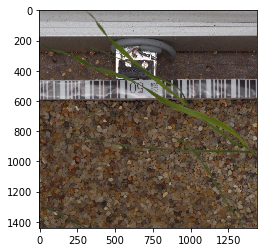

In [11]:
img = plt.imread(PATH_IMG)
plt.imshow(img)

In [12]:
w,h = get_stats_from_path(PATH+'train')

/home/ubuntu/Plant/data/train/Common wheat
/home/ubuntu/Plant/data/train/Sugar beet
/home/ubuntu/Plant/data/train/Small-flowered Cranesbill
/home/ubuntu/Plant/data/train/Shepherds Purse
/home/ubuntu/Plant/data/train/Cleavers
/home/ubuntu/Plant/data/train/Loose Silky-bent
/home/ubuntu/Plant/data/train/Maize
/home/ubuntu/Plant/data/train/Scentless Mayweed
/home/ubuntu/Plant/data/train/Common Chickweed
/home/ubuntu/Plant/data/train/Charlock
/home/ubuntu/Plant/data/train/Fat Hen
/home/ubuntu/Plant/data/train/Black-grass
Height min: 49 max: 3457
Width min: 49 max: 3991


(array([ 2574.,   923.,   224.,    61.,    13.,     5.,     2.,     2.,     0.,     2.]),
 array([   49. ,   443.2,   837.4,  1231.6,  1625.8,  2020. ,  2414.2,  2808.4,  3202.6,  3596.8,  3991. ]),
 <a list of 10 Patch objects>)

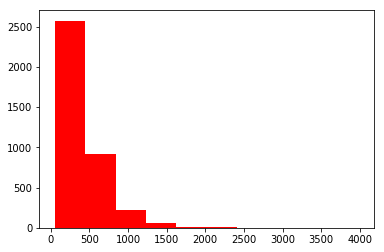

In [13]:
plt.hist(w, color='red', label='widths')

(array([ 2332.,  1058.,   265.,   104.,    28.,    12.,     2.,     2.,     0.,     3.]),
 array([   49. ,   389.8,   730.6,  1071.4,  1412.2,  1753. ,  2093.8,  2434.6,  2775.4,  3116.2,  3457. ]),
 <a list of 10 Patch objects>)

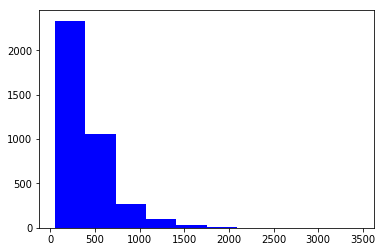

In [14]:
plt.hist(h, color='blue', label='heights')

In [15]:
min(h), max(h)

(49, 3457)

In [16]:
import shutil

In [17]:
from os.path import exists

In [18]:
def create_valid(path, pct_split=.8):
    val_path = path + 'valid'
    train_dir_dict = {}

    # Train dir statistics
    if not exists(val_path):
        train_path = path + 'train'
        train_master = path + 'train_master'

        for root, dirs, files in os.walk(train_path):
            if len(files) > 0:
                train_dir_dict[root] = len(files)
                print('Train Folder Name: {} Total Files: {}'.format(root, files))

        # Create a master_backup_train
        if not exists(train_master):
            shutil.copytree(train_path, train_master)

        # Compute how many files need to be copied
        for train_dir_sub in train_dir_dict:
            files_to_cp = int(train_dir_dict[train_dir_sub] * (1 - pct_split))
            # print(files_to_cp)
            train_dir_dict[train_dir_sub] = files_to_cp

            train_files = []
            # Get List of file in that direcory
            for root, dirs, files in os.walk(train_dir_sub):
                train_files = files

            # move files into valid directory
            destination = val_path + '/' + train_dir_sub.split('/')[-1]
            os.makedirs(destination)

            print('Destination Folder Name: {} Total Files: {}'.format(destination, files_to_cp))

            for i in train_files[:files_to_cp]:
                source = train_dir_sub + '/' + i
                shutil.move(source, destination + '/' + i)
    else:
        print('Validation path exists')

In [19]:
PATH = '/home/ubuntu/Plant/data/'
k = create_valid(PATH)

Validation path exists


In [85]:
data = ! ls /home/ubuntu/Plant/data/train

In [89]:
image_class = {}
for i in data:
    images = !ls '{PATH}train/{i}'
    key = PATH+'train/'+i
    image_class[key] = images[0:1]

In [93]:
from IPython.display import Image
for k in image_class:
 
    for v in image_class[k]:
        path = k + '/' + v
        print(path)

/home/ubuntu/Plant/data/train/Black-grass/0050f38b3.png
/home/ubuntu/Plant/data/train/Charlock/022179d65.png
/home/ubuntu/Plant/data/train/Cleavers/005b4a3e3.png
/home/ubuntu/Plant/data/train/Common Chickweed/00b6eee9f.png
/home/ubuntu/Plant/data/train/Common wheat/012db0f43.png
/home/ubuntu/Plant/data/train/Fat Hen/00268e97d.png
/home/ubuntu/Plant/data/train/Loose Silky-bent/00442de98.png
/home/ubuntu/Plant/data/train/Maize/006196e1c.png
/home/ubuntu/Plant/data/train/Scentless Mayweed/01358344b.png
/home/ubuntu/Plant/data/train/Shepherds Purse/006a4d00d.png
/home/ubuntu/Plant/data/train/Small-flowered Cranesbill/003402ea0.png
/home/ubuntu/Plant/data/train/Sugar beet/0026b7a30.png


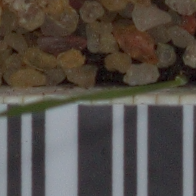

In [94]:
Image('/home/ubuntu/Plant/data/train/Black-grass/0050f38b3.png')

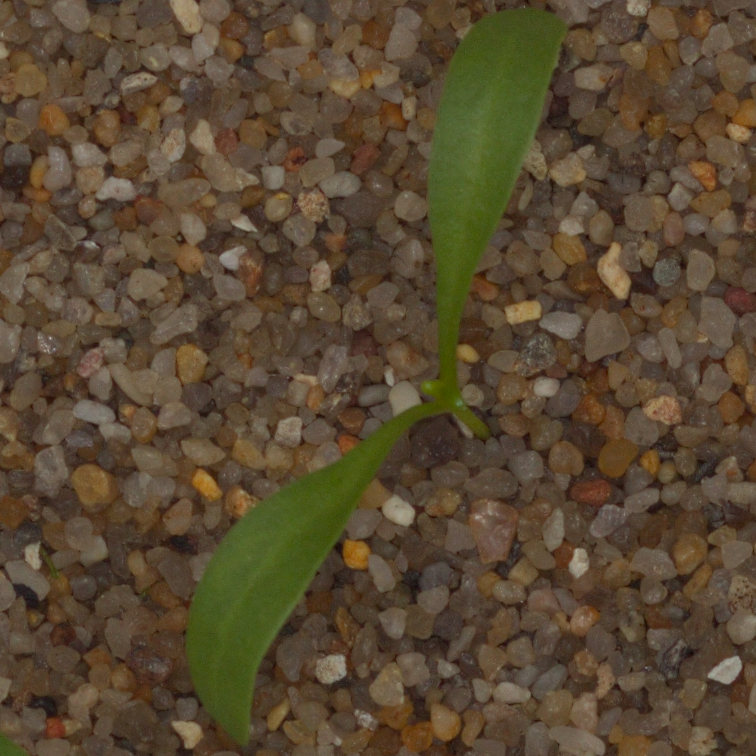

In [98]:
Image('/home/ubuntu/Plant/data/train/Sugar beet/0026b7a30.png')

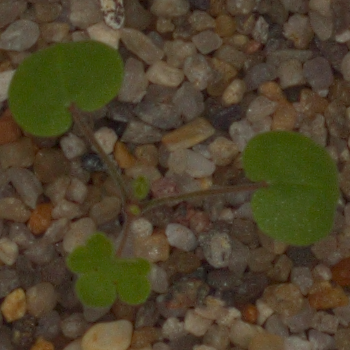

In [99]:
Image('/home/ubuntu/Plant/data/train/Small-flowered Cranesbill/003402ea0.png')

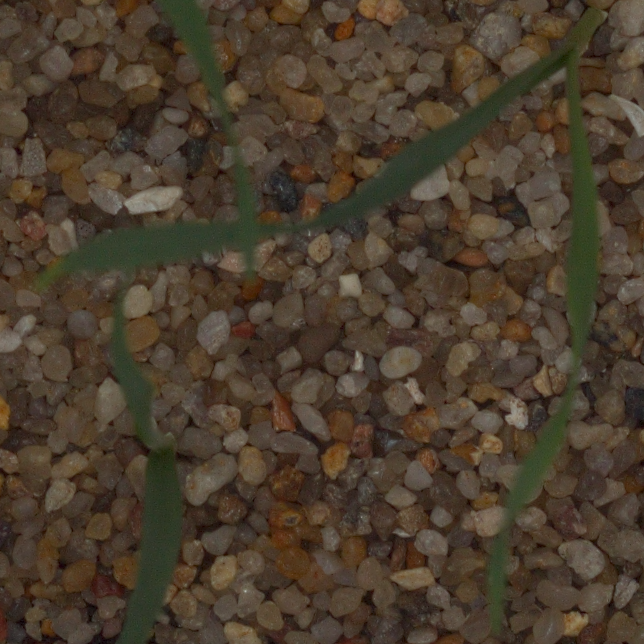

In [100]:
Image('/home/ubuntu/Plant/data/train/Common wheat/012db0f43.png')

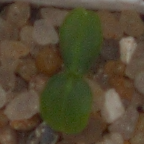

In [101]:
Image('/home/ubuntu/Plant/data/train/Cleavers/005b4a3e3.png')